# What are the most demanded skills for the 3 most popular data roles?

### Methodology

1. Clean-up skill column
2. Calculate skill count based on ```job_title_short```
3. Calculate skill percentage
4. Plot final findings


In [3]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
df = pd.read_csv('data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_IT = df[df['job_country'] == 'Italy']

In [5]:
df_skills = df_IT.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
46,Data Analyst,sas
46,Data Analyst,sas
46,Data Analyst,r
46,Data Analyst,python
46,Data Analyst,vba
...,...,...
785614,Data Engineer,gcp
785614,Data Engineer,azure
785675,Data Analyst,aws
785675,Data Analyst,airflow


In [6]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
849,python,Data Scientist,2841
1089,sql,Data Engineer,2034
848,python,Data Engineer,1919
291,excel,Data Analyst,1720
1090,sql,Data Scientist,1608
...,...,...,...
507,jquery,Data Engineer,1
1167,terminal,Data Analyst,1
161,chef,Business Analyst,1
510,julia,Data Analyst,1


In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

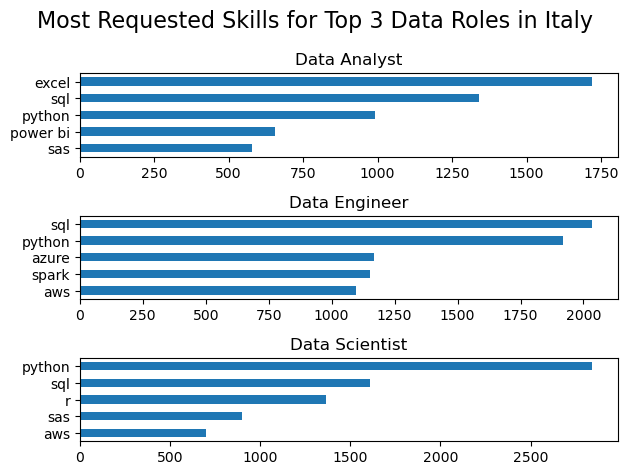

In [15]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Most Requested Skills for Top 3 Data Roles in Italy', fontsize=16)
fig.tight_layout()
plt.show()

In [17]:
df_job_title_count = df_IT['job_title_short'].value_counts().reset_index(name='jobs_total')

In [22]:
df_skills_perc =pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_perc'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,2841,4396,64.626934
1,sql,Data Engineer,2034,3567,57.022708
2,python,Data Engineer,1919,3567,53.798710
3,excel,Data Analyst,1720,4543,37.860445
4,sql,Data Scientist,1608,4396,36.578708
...,...,...,...,...,...
1308,jquery,Data Engineer,1,3567,0.028035
1309,terminal,Data Analyst,1,4543,0.022012
1310,chef,Business Analyst,1,1267,0.078927
1311,julia,Data Analyst,1,4543,0.022012


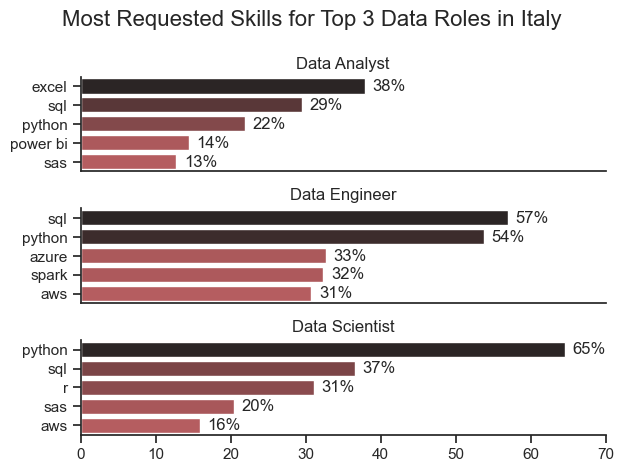

In [53]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_perc', ax=ax[i], title=job_title, legend=False)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:r_r', legend=False)
    sns.despine()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0, 70)

    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Most Requested Skills for Top 3 Data Roles in Italy', fontsize=16)
fig.tight_layout(h_pad=1)
plt.show()